# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2004 Денисёнок Никита
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Варианты заданий:

Вариант | Задание
:-------- |:-----
1, 7, 13, 19, 25 | Алгоритм Флойда-Уоршелла
2, 8, 14, 20, 26 | Алгоритм Дейкстры
3, 9,15,21,27 | Алгоритм Беллмана-Форда
4, 10, 16, 22, 28 | Алгоритм Джонсона
5, 11, 17, 23, 29| Алгоритм Левита
6, 12, 18, 24, 30 | Алгоритм Йена



### Выполнение:

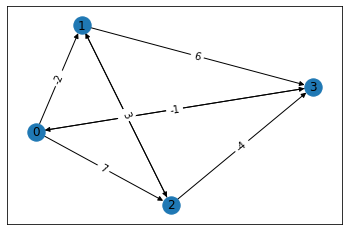

Modified Graph: [[0, 0, 2, 4], [0, 0, 1, 3], [0, 10, 0, 0], [0, 0, 0, 0]]

Shortest Distance with vertex 0 as the source:

Vertex 0: 0
Vertex 1: 0
Vertex 2: 1
Vertex 3: 1

Shortest Distance with vertex 1 as the source:

Vertex 0: 1
Vertex 1: 0
Vertex 2: 1
Vertex 3: 1

Shortest Distance with vertex 2 as the source:

Vertex 0: 0
Vertex 1: 0
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 3 as the source:

Vertex 0: 0
Vertex 1: 0
Vertex 2: 1
Vertex 3: 0


In [73]:
from collections import defaultdict
MAX_INT = float('Inf')
  
# Возвращает вершину с наименьшей стоимостью пути  
# из исходной вершины
def minDistance(dist, visited):
  
    minimum, minVertex = MAX_INT, 0
    for vertex in range(len(dist)):
        if minimum > dist[vertex] and visited[vertex] == False:
            minimum, minVertex = dist[vertex], vertex
    return minVertex
  
  
# Алгоритм дийкстры (применяется к графу с уже положительными весами)
def Dijkstra(graph, modifiedGraph, src):
  
    # количество вершин
    numVertices = len(graph)
  
    # Словарь для проверки посещенных точек
    sptSet = defaultdict(lambda : False)
  
    # в эту переменную записываются наименьшие стоимости маршрутов в каждую точку графа из текущей
    dist = [MAX_INT] * numVertices
  
    dist[src] = 0
    for count in range(numVertices):
        # если текущая вершина не содержится в sptSet 
        # и при этом находится на минимальном расстоянии 
        # от источника
        curVertex = minDistance(dist, sptSet)
        sptSet[curVertex] = True

        for vertex in range(numVertices):
            if ((sptSet[vertex] == False) and (dist[vertex] > (dist[curVertex] + modifiedGraph[curVertex][vertex])) and (graph[curVertex][vertex] != 0)):  
                dist[vertex] = (dist[curVertex] + modifiedGraph[curVertex][vertex])

    
    # выводим наименьшие стоимости маршрутов источника
    for vertex in range(numVertices):
        print ('Vertex ' + str(vertex) + ': ' + str(dist[vertex]))
  
# Функция для подсчета минимального арсстояния от добавленной мнимой вершины
# до всех остальных с использованием Форда-Беллмана
def BellmanFord(edges, numVertices):
  
    # добавляем вершину src
    # и считаем стоимости маршрута до остальных
    dist = [MAX_INT] * (numVertices + 1)
    dist[numVertices] = 0
  
    for i in range(numVertices):
        edges.append([numVertices, i, 0])
  
    for i in range(numVertices):
        for (src, des, weight) in edges:
            if((dist[src] != MAX_INT) and (dist[src] + weight < dist[des])):
                dist[des] = dist[src] + weight
  
    # возвращаем список без нулевой мнимой вершины
    return dist[0:numVertices]
  
# Непосредственно алгоритм джонсона
def JohnsonAlgorithm(graph):
  
    edges = []
  
    # сздаем список вершин для алгоритма беллмана-форда
    for i in range(len(graph)):
        for j in range(len(graph[i])):
  
            if graph[i][j] != 0:
                edges.append([i, j, graph[i][j]])
  
    # Список стоимостей пути от добавленной вершины к каждой вершине исходного графа
    modifyWeights = BellmanFord(edges, len(graph))
  
    modifiedGraph = [[0 for x in range(len(graph))] for y in range(len(graph))]
  
    # избавляемся от отрицательных весов дуг
    for i in range(len(graph)):
        for j in range(len(graph[i])):
  
            if graph[i][j] != 0:
                modifiedGraph[i][j] = (graph[i][j] + modifyWeights[i] - modifyWeights[j])
  
    print ('Modified Graph: ' + str(modifiedGraph))
  
    # Для каждой вершины запускаем алгоритм дийкстры
    for src in range(len(graph)):
        print ('\nShortest Distance with vertex ' + str(src) + ' as the source:\n')
        Dijkstra(graph, modifiedGraph, src)


# Вызовы
with open('source.txt') as f:
    graph = [list(map(int, row.split())) for row in f.readlines()]

import networkx as nx 
G = nx.DiGraph()
for i in range(len(graph)): 
    for j in  range (len(graph[i])): 
        if graph[i][j] != 0:
            G.add_edge(i,j, weight=graph[i][j]) 
import matplotlib.pyplot as plt 


pos = nx.spring_layout(G, k = 10, seed = 154543) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)


#plt.box()
#plt.axis('off')
plt.savefig('filename.png', dpi=300)
plt.show() 

  
JohnsonAlgorithm(graph)

### Алгоритмическая сложность O(VE+ V^3)
Поскольку слоность алгоритма Дийкстры для матрицы смежности V^2, <br/>
а сложность алгоритма Форда-Беллмана VE.

Количество вершин | Сложность
:-------- |:-----
4 | O(4E+64)
5 | O(5E+125)
6 | O(6E+216)
7 | O(7E+343)
8 | O(8E+512)
9 | O(9E+729)